In [ ]:
#Test-1
#y = x^3 - 2x
#y' = 3x^2 - 2

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#The seed() method is used to initialize the random number generator.
#By default the random number generator uses the current system time.

np.random.seed(11876543)
tf.random.set_seed(11876543)

In [3]:
# initial conditions
y0 = 0
y1 = -1

# infinitesimal small number
inf_s = np.sqrt(np.finfo(np.float32).eps)

# Parameters
learning_rate = 0.04
training_steps = 200
batch_size = 20

In [4]:
# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_output]))
}

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [5]:
# Create model
def multilayer_perceptron(x):
    x = np.array([[[x]]],  dtype='float32')
    
    # Hidden fully connected layer with 32 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden fully connected layer with 32 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Output fully connected layer
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return output

In [6]:
# Given ODE
def dF(x):
    return (3 * x**2) - 2

# Derivated ODE
def f(x): #put here two point boundary problem
    return x**3 - 2*x

# Universal Approximator
def g(x):
    return (y0 * (1-x)) + (y1 * x) + (x * (1-x) * multilayer_perceptron(x))

# Derivated Approximator
def dG(x):
    return (g(x + inf_s) - g(x)) / inf_s

In [7]:
# Custom loss function to approximate the derivatives
def custom_loss():
    summation = []
    for x in np.linspace(0, 1, 10):
        dNN = dG(x)
        summation.append((dNN - dF(x))**2)
    return tf.reduce_sum( tf.abs(summation) )

In [8]:
def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss()
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [9]:
for i in range(training_steps):
    train_step()
    
    if i % batch_size == 0:
        print("loss: %f " % (custom_loss()))

loss: 26.400564 
loss: 0.753743 
loss: 0.496045 
loss: 0.300607 
loss: 0.157202 
loss: 0.074224 
loss: 0.039589 
loss: 1.681232 
loss: 0.083031 
loss: 0.019860 


True_result:  [0.0, -0.020200989591868074, -0.04039579552282338, -0.060578234131953144, -0.0807421217583446, -0.10088127474108498, -0.1209895094192615, -0.1410606421319614, -0.1610884892182719, -0.18106686701728025, -0.2009895918680737, -0.22085048010973937, -0.24064334808136462, -0.26036201212203663, -0.28000028857084264, -0.2995519937668698, -0.3190109440492055, -0.3383709557569368, -0.35762584522915103, -0.3767694288049354, -0.39579552282337715, -0.4146979436235635, -0.43347050754458166, -0.4521070309255189, -0.47060133010546235, -0.4889472214234994, -0.5071385212187172, -0.525169045830203, -0.5430326115970439, -0.5607230348583272, -0.5782341319531402, -0.5955597192205702, -0.6126936129997043, -0.6296296296296297, -0.6463615854494337, -0.6628832967982036, -0.6791885800150264, -0.6952712514389895, -0.7111251274091801, -0.7267440242646854, -0.7421217583445928, -0.7572521459879894, -0.7721290035339622, -0.7867461473215989, -0.8010973936899863, -0.815176558978212, -0.8289774595253628, -

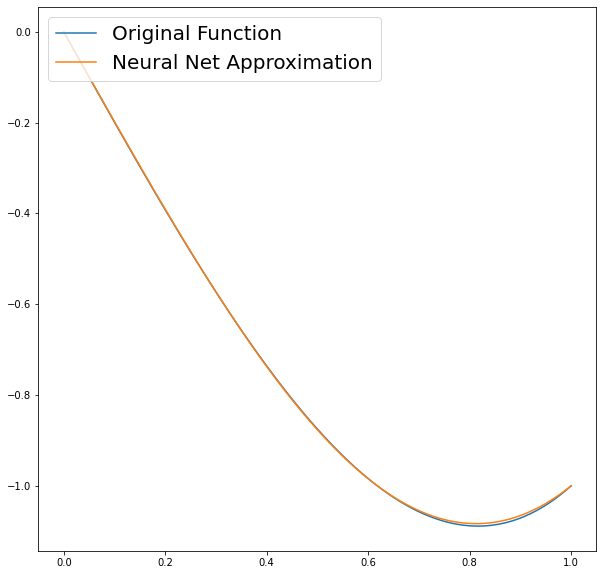

In [10]:
plt.figure(figsize=(10,10))

X = np.linspace(0, 1, 100)

true_result = []
neural_result = []

for i in X:
    true_result.append( f(i) )
    neural_result.append( g(i).numpy()[0][0][0] )

    
print("True_result: ", true_result)
print("neural_result: ", neural_result)
  
plt.plot(X, true_result, label="Original Function")
plt.plot(X, neural_result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [11]:
true_result

[0.0,
 -0.020200989591868074,
 -0.04039579552282338,
 -0.060578234131953144,
 -0.0807421217583446,
 -0.10088127474108498,
 -0.1209895094192615,
 -0.1410606421319614,
 -0.1610884892182719,
 -0.18106686701728025,
 -0.2009895918680737,
 -0.22085048010973937,
 -0.24064334808136462,
 -0.26036201212203663,
 -0.28000028857084264,
 -0.2995519937668698,
 -0.3190109440492055,
 -0.3383709557569368,
 -0.35762584522915103,
 -0.3767694288049354,
 -0.39579552282337715,
 -0.4146979436235635,
 -0.43347050754458166,
 -0.4521070309255189,
 -0.47060133010546235,
 -0.4889472214234994,
 -0.5071385212187172,
 -0.525169045830203,
 -0.5430326115970439,
 -0.5607230348583272,
 -0.5782341319531402,
 -0.5955597192205702,
 -0.6126936129997043,
 -0.6296296296296297,
 -0.6463615854494337,
 -0.6628832967982036,
 -0.6791885800150264,
 -0.6952712514389895,
 -0.7111251274091801,
 -0.7267440242646854,
 -0.7421217583445928,
 -0.7572521459879894,
 -0.7721290035339622,
 -0.7867461473215989,
 -0.8010973936899863,
 -0.81517655

In [12]:
neural_result

[0.0,
 -0.020064577,
 -0.040122345,
 -0.060169358,
 -0.08020151,
 -0.10021445,
 -0.120203674,
 -0.14016443,
 -0.16009189,
 -0.1799809,
 -0.19982624,
 -0.21962252,
 -0.23936409,
 -0.25904524,
 -0.27865994,
 -0.29820228,
 -0.31766593,
 -0.33704472,
 -0.356332,
 -0.3755213,
 -0.39460588,
 -0.413579,
 -0.4324337,
 -0.451163,
 -0.4697598,
 -0.48821697,
 -0.50652725,
 -0.5246835,
 -0.54267824,
 -0.56050426,
 -0.578154,
 -0.5956203,
 -0.6128954,
 -0.6299721,
 -0.6468427,
 -0.6635001,
 -0.67993647,
 -0.6961446,
 -0.7121171,
 -0.72784656,
 -0.7433257,
 -0.7585472,
 -0.7735039,
 -0.7881887,
 -0.8025943,
 -0.8167138,
 -0.8305402,
 -0.84406674,
 -0.8572864,
 -0.87019265,
 -0.88277876,
 -0.8950384,
 -0.9069649,
 -0.91855204,
 -0.92979383,
 -0.9406837,
 -0.95121586,
 -0.9613847,
 -0.97118413,
 -0.9806086,
 -0.9896525,
 -0.9983103,
 -1.0065773,
 -1.0144477,
 -1.0219165,
 -1.0289791,
 -1.0356306,
 -1.0418661,
 -1.0476811,
 -1.0530714,
 -1.0580324,
 -1.0625602,
 -1.0666505,
 -1.0702994,
 -1.0735031,
 -

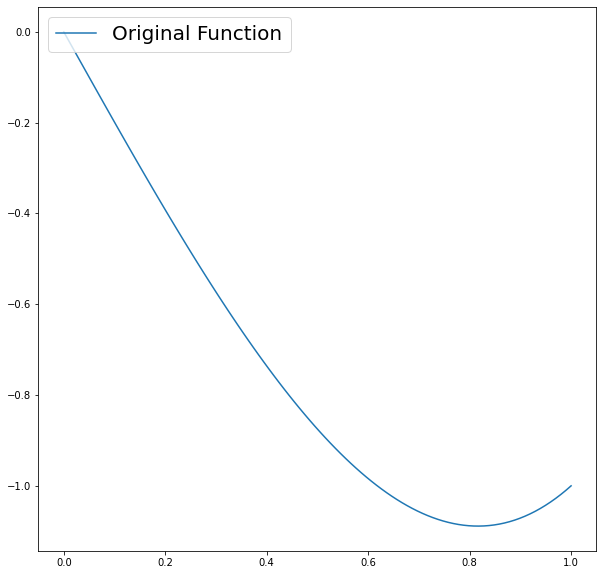

In [ ]:
plt.figure(figsize=(10,10))

X = np.linspace(0, 1, 100)

true_result = []
neural_result = []

for i in X:
    true_result.append( f(i) )
    neural_result.append( g(i).numpy()[0][0][0] )
    
#print("True_result: ", true_result)
#print("neural_result: ", neural_result)
  
plt.plot(X, true_result, label="Original Function")
#plt.plot(X, neural_result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()